In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [42]:
data=pd.read_csv("train.csv")
#data.info()


C:\Users\HP\AppData\Local\Temp\ipykernel_10404\719694308.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.drop(columns='SalePrice').corr()


<Axes: >

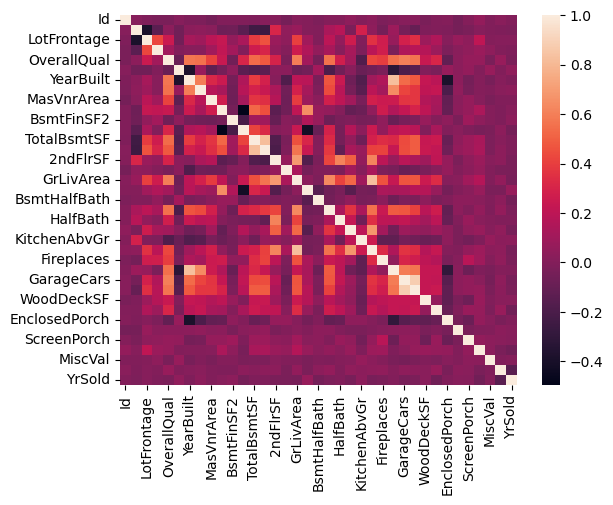

In [43]:
corrmat=data.drop(columns='SalePrice').corr()
sns.heatmap(corrmat)

In [85]:
scaler1=StandardScaler()
scaled_numeric=scaler1.fit_transform(data[[i for i in corrmat.columns]])
numeric_data=pd.DataFrame(data=scaled_numeric,columns=corrmat.columns)

In [89]:

numeric_data=numeric_data.fillna(0)
numeric_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [44]:
eigenvalue,eigenvector=np.linalg.eig(corrmat)

In [45]:
eigenvalue
idx=eigenvalue.argsort()[::-1]
eigenvalue[idx]
eigenvector=eigenvector[:,idx]
eigenvector

array([[-2.24002663e-03,  1.71428771e-02, -9.95867335e-04, ...,
        -3.01197334e-03,  2.93282829e-05,  2.63825864e-04],
       [-1.75162012e-02,  1.59068182e-01,  2.35187059e-01, ...,
        -2.97864774e-02, -1.36044485e-05,  2.49065236e-03],
       [ 1.74046004e-01, -2.25317084e-03, -3.05300876e-01, ...,
         3.86570262e-02,  9.79437842e-05,  4.87390415e-03],
       ...,
       [-1.08342416e-02,  2.72868202e-02, -3.98740447e-02, ...,
         1.14849006e-02,  1.07537981e-05,  1.72976004e-04],
       [ 2.15248260e-02,  2.89272555e-02,  5.14403185e-03, ...,
        -4.08931583e-03,  1.92369606e-05, -8.81724125e-05],
       [-1.30792613e-02, -3.61797795e-02, -3.04117191e-03, ...,
         1.22627389e-03, -1.11382328e-05,  1.39090741e-05]])

In [46]:
explained_var=eigenvalue.cumsum()/eigenvalue.sum()
explained_var

array([0.19491339, 0.2817731 , 0.35327318, 0.40796233, 0.44792123,
       0.44791953, 0.44791952, 0.45045974, 0.45357159, 0.45719612,
       0.46242158, 0.46756438, 0.47440395, 0.4819852 , 0.49035207,
       0.50037242, 0.51099147, 0.52434514, 0.54013953, 0.55677995,
       0.58911484, 0.60739094, 0.63858228, 0.66918639, 0.69946969,
       0.72897021, 0.75790206, 0.78621824, 0.81364863, 0.84065333,
       0.86654966, 0.89110834, 0.91463149, 0.93440451, 0.95677337,
       0.97863072, 1.        ])

In [47]:
n_components=np.argmax(explained_var>0.5)+1
n_components

16

In [100]:
selected=eigenvector[:,:n_components]
selected.shape

(37, 16)

In [98]:
numeric_data.shape

(1460, 37)

In [101]:
pca_data=pd.DataFrame(data=np.dot(numeric_data,selected))

In [102]:
pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.469277,0.306240,1.710064,-1.897938,-0.410661,1.386128,-0.462999,-0.588206,-0.212249,-0.716867,1.064945,-0.824316,0.405475,-0.184957,0.236233,0.915124
1,-0.030628,-1.053413,-1.259550,-0.056022,1.821981,-0.097432,3.771356,0.092974,0.251862,-0.014824,1.031608,1.360590,1.629878,-0.023893,-0.698692,1.113024
2,1.654332,0.192335,1.477507,-1.339622,0.233283,-0.129500,-0.070492,-0.578374,-0.396922,-0.684737,0.851683,-0.851338,-0.777130,-0.648724,0.359415,0.198888
3,-0.353281,1.000619,-0.660932,-0.183538,-0.425365,0.423167,-1.446720,0.483197,-0.381566,-2.579370,0.869677,1.756024,-0.126787,-1.638725,3.221926,1.201351
4,4.393782,1.098283,0.579289,-1.393025,0.186642,-0.462779,0.615014,-0.723678,-0.840623,-0.588254,0.677722,-0.416023,-1.476450,-0.738535,0.151136,0.682485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.826248,1.331637,2.017636,0.537380,0.458041,-0.668765,-0.721891,0.154766,-0.936852,0.728112,-0.989643,-0.068543,0.003554,0.370851,-0.020183,-0.427279
1456,2.317153,-1.605711,-2.323157,0.040795,-0.536256,2.038086,0.037149,0.096371,0.872829,1.155913,-0.717714,1.469745,-0.045899,0.676526,-1.037015,-1.068803
1457,0.446318,3.416072,-1.536788,-0.136435,1.381642,1.949424,1.117762,1.292426,2.848761,0.323233,-3.994432,-1.140056,0.429318,-2.184544,-0.977326,-0.711151
1458,-2.815828,-1.933746,-1.994899,-1.083609,0.426869,2.548672,-0.146970,1.664472,0.316949,4.083669,0.455604,1.736965,-1.515051,0.578077,2.603479,-1.588934


<Axes: >

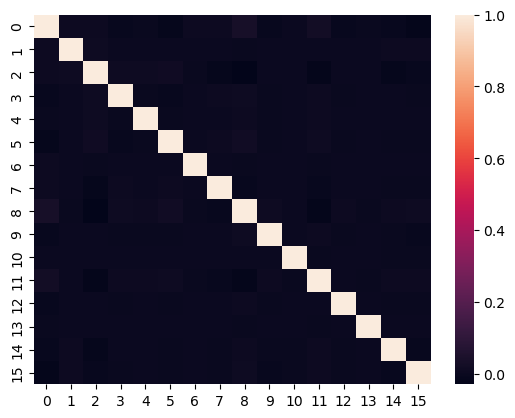

In [104]:

sns.heatmap(pca_data.corr())

In [105]:
pca_data.columns=[str(i) for i in pca_data.columns]

In [106]:

non_numeric_data=pd.DataFrame()
for i in data.columns:
    if not pd.api.types.is_numeric_dtype(data[i]):
        non_numeric_data[i]=data[i]
non_numeric_data=non_numeric_data.fillna("Null")
non_numeric_data['SalePrice']=data['SalePrice']
        

In [107]:
for i in non_numeric_data.columns[:-1]:
    
    mean_dict=non_numeric_data.groupby([i])['SalePrice'].mean().to_dict()
    non_numeric_data[i]=non_numeric_data[i].map(mean_dict)


In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(non_numeric_data)

In [110]:
non_numeric_data=pd.DataFrame(data=scaled_data,columns=non_numeric_data.columns)
non_numeric_data.info()
pca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   float64
 1   Street         1460 non-null   float64
 2   Alley          1460 non-null   float64
 3   LotShape       1460 non-null   float64
 4   LandContour    1460 non-null   float64
 5   Utilities      1460 non-null   float64
 6   LotConfig      1460 non-null   float64
 7   LandSlope      1460 non-null   float64
 8   Neighborhood   1460 non-null   float64
 9   Condition1     1460 non-null   float64
 10  Condition2     1460 non-null   float64
 11  BldgType       1460 non-null   float64
 12  HouseStyle     1460 non-null   float64
 13  RoofStyle      1460 non-null   float64
 14  RoofMatl       1460 non-null   float64
 15  Exterior1st    1460 non-null   float64
 16  Exterior2nd    1460 non-null   float64
 17  MasVnrType     1460 non-null   float64
 18  ExterQua

In [113]:
preprocessed_data=pd.concat([pca_data,non_numeric_data],axis=1)
preprocessed_data['SalePrice']=data['SalePrice']

In [122]:
x_train,x_test,y_train,y_test=train_test_split(preprocessed_data.drop(columns='SalePrice'),preprocessed_data['SalePrice'])
x_train.shape
y_train.shape

(1095,)

In [123]:
reg=RandomForestRegressor()
clf=reg.fit(x_train,y_train)

In [129]:
predicted=clf.predict(x_test)

In [131]:
prediction=pd.DataFrame()
prediction['actual']=y_test
prediction['prediction']=predicted

In [132]:
prediction

,actual,prediction
1214,134500,131148.25
325,87000,99218.02
100,205000,208752.79
209,145000,138460.71
1019,213490,195330.45
...,...,...
488,160000,140864.87
956,124000,128440.09
680,143000,132118.09
520,106250,94900.22
